In [71]:
import ROOT
import uproot

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

## Some libraries/help

In [62]:
help(uproot)

Help on package uproot:

NAME
    uproot - Uproot: ROOT I/O in pure Python and NumPy.

DESCRIPTION
    Nearly all of the functions needed for general use are imported here, but the
    documentation gives fully qualified names. For example, the most frequently
    used function in Uproot is
    
    .. code-block:: python
    
        uproot.open("path/to/filename.root")
    
    but we refer to it in the documentation as :doc:`uproot.reading.open`.
    
    Typical entry points for file-reading are
    
    * :doc:`uproot.reading.open`
    * :doc:`uproot.behaviors.TBranch.iterate`
    * :doc:`uproot.behaviors.TBranch.concatenate`
    * :doc:`uproot.behaviors.TBranch.lazy`
    
    though they would usually be accessed as ``uproot.iterate``,
    ``uproot.concatenate``, and ``uproot.lazy``.
    
    The most useful classes are
    
    * :doc:`uproot.behaviors.TBranch.HasBranches` (``TTree`` or ``TBranch``)
    * :doc:`uproot.behaviors.TBranch.TBranch`
    * :doc:`uproot.behaviors.TH1`


In [66]:
help(ROOT)
help(ROOT.TTree)

"from ROOT import *" is not supported in Python 3

Help on class TTree in module ROOT:

class TTree(TNamed, TAttLine, TAttFill, TAttMarker)
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      TTree
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddAllocationCount = <ROOT.MethodProxy object>
 |  AddBranchToCache = <ROOT.MethodProxy object>
 |  AddClone = <ROOT.MethodProxy object>
 |  AddFriend = <ROOT.MethodProxy object>
 |  AddTotBytes = <ROOT.MethodProxy object>
 |  AddZipBytes = <ROOT.MethodProxy object>
 |  AsMatrix = _TTreeAsMatrix(self, columns=None, exclude=None, dtype='double', return_labels=False)
 |      Read-out the TTree as a numpy array.
 |      
 |      Note that the reading is performed in multiple threads if the implicit
 |      multi-threading of ROOT is enabled.
 |      
 |      Parameters:
 |          columns: If None return

In [33]:
fileName = "/data/alice/wesselr/07-09-2021_58MB_Pt120_tune14_10k_SD/JetToyHIResultSoftDrop.root"
#fileName = "/data/alice/wesselr/01-09-2021_1.2GB_Pt120_tune14_100k_SD_and_Practice/JetToyHIResultSoftDrop.root"
#fileName = "~/Library/JetToyHI/JetToyHIResultSoftDrop.root"

In [90]:
# different file locations for different systems
inFile = ROOT.TFile(fileName, "READ")
inFile.ls()

TFile**		/data/alice/wesselr/07-09-2021_Pt120_tune14_58MB/JetToyHIResultSoftDrop.root	
 TFile*		/data/alice/wesselr/07-09-2021_Pt120_tune14_58MB/JetToyHIResultSoftDrop.root	
  KEY: TTree	jetTreeSig;1	JetToyHI tree


In [ ]:
tree = inFile.Get("jetTreeSig")
tree.Print()

In [36]:
pt = tree.GetBranch("sigJetPt")
eta = tree.GetBranch("sigJetEta")
m = tree.GetBranch("sigJetM")

#pt_hist = ROOT.TH1D("data","m_{ll}, data" ,150,50.e3 ,200.e3)
#pt_hist.Sumw2()

In [37]:
type(pt)

ROOT.TBranchElement

In [38]:
#data, columns = tree.AsMatrix(columns=["sigJetRecur_nSD"], dtype="vector<double>")

In [39]:
for entry in range(0, tree.GetEntries()):
    print(entry)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442


4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288


In [40]:
help(ROOT.TTree)

Help on class TTree in module ROOT:

class TTree(TNamed, TAttLine, TAttFill, TAttMarker)
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      TTree
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddAllocationCount = <ROOT.MethodProxy object>
 |  AddBranchToCache = <ROOT.MethodProxy object>
 |  AddClone = <ROOT.MethodProxy object>
 |  AddFriend = <ROOT.MethodProxy object>
 |  AddTotBytes = <ROOT.MethodProxy object>
 |  AddZipBytes = <ROOT.MethodProxy object>
 |  AsMatrix = _TTreeAsMatrix(self, columns=None, exclude=None, dtype='double', return_labels=False)
 |      Read-out the TTree as a numpy array.
 |      
 |      Note that the reading is performed in multiple threads if the implicit
 |      multi-threading of ROOT is enabled.
 |      
 |      Parameters:
 |          columns: If None return all branches as columns, otherwise specify names i

# Use uproot to access the data from the .root file

In [41]:
file = uproot.open(fileName)
tree = file['jetTreeSig']

print(type(tree),
     file.keys(),
     tree.keys(),
     #tree.arrays(), 
     sep="\n")

<class 'uproot.models.TTree.Model_TTree_v20'>
['jetTreeSig;1']
['eventWeight', 'sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea', 'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD', 'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad', 'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12', 'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z', 'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt', 'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf', 'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta', 'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area', 'sigJetSDZ01B00dr12', 'sigJetSDZ01B00leadingtrack_pt', 'sigJetSDZ01B00logdr12', 'sigJetSDZ01B00logztheta', 'sigJetSDZ01B00mass', 'sigJetSDZ01B00zg', 'sigJetSDZ01B00ndrop', 'sigJetSDZ01B00KTPt', 'sigJetSDZ01B00KTEta', 'sigJetSDZ01B00KTPhi', 'sigJetSDZ01B00KTM', 'sigJetSDZ01B00KTArea', 'sigJetSDZ01B00KTdr12', 'sigJetSDZ01B00KTleadingtrack_pt', 'sigJetSDZ01B00KTlogdr12', 's

## First experiment with numpy

In [42]:
# did not work on the NIKHEF PCs!!!
# two issues on Nikhef PC: 1. I could not access tree.arrays() 2. I could not set library="np"
data = tree.arrays(library="np")
print(type(tree), type(data), type(data['sigJetPt']), type(tree['sigJetPt']), sep="\n")

<class 'uproot.models.TTree.Model_TTree_v20'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'uproot.models.TBranch.Model_TBranchElement_v10'>


### Test to print out all the Pts of first particle of a jet
First using sigJetPt, then with sigJetRecurKT_pt

With list comprehension we can grab the first pt value of each jet

In [43]:
data['sigJetPt'][:30] # 30 events
pts_parent = [data['sigJetPt'][:30][i][0] for i in range(30)]
print(pts_parent, type(pts_parent))
print(data['sigJetPt'][:30])

[166.25909442881849, 128.42377435866584, 127.104102400976, 134.1303085495626, 147.87946386624265, 52.1349273622634, 187.0297987070573, 131.1332145915834, 122.8348229799347, 124.72236403135574, 340.66777033749656, 144.36546135945872, 134.11128145415273, 130.49131236475407, 146.11328389590113, 103.81681677979199, 137.84924763315547, 202.0883919051591, 129.1598589121022, 118.39367781361497, 156.12755747935068, 122.8121901610495, 193.2796540057812, 135.0444580750054, 154.63418989348128, 143.99142091625086, 138.98810436791516, 210.684098601666, 151.93808238307614, 207.44590027478313] <class 'list'>
[array([166.25909443, 118.90896773,  15.53161087])
 array([128.42377436, 102.86987677,  48.14748595,  15.64862377])
 array([127.1041024 ,  84.65878858,  57.24780208])
 array([134.13030855,  69.28795606,  34.9415724 ,  31.61821612,
        17.97509743,  13.34487428])
 array([147.87946387, 124.99757509, 119.55183306,  52.04653624,
        10.89304865])
 array([52.13492736, 37.39007221, 29.86888377,

In [44]:
pts_recur = [data['sigJetRecur_jetpt'][:30][i][0][0] for i in range(30)]
print(pts_recur)

[166.25909442881849, 128.4237743586658, 127.10410240097603, 134.13030854956264, 147.87946386624265, 52.134927362263404, 187.02979870705727, 131.1332145915834, 122.83482297993466, 124.72236403135571, 340.6677703374965, 144.36546135945872, 134.11128145415273, 130.49131236475404, 146.11328389590113, 103.81681677979199, 137.84924763315547, 202.08839190515909, 129.1598589121022, 118.39367781361499, 156.12755747935068, 122.81219016104949, 193.2796540057812, 135.04445807500537, 154.63418989348133, 143.99142091625083, 138.98810436791513, 210.684098601666, 151.93808238307614, 207.44590027478313]


In [45]:
# Todo: flatten this?
pt = data["sigJetPt"]
m = data["sigJetM"]
eta = data["sigJetEta"]

print(pt, pt.shape, type(pt), sep="\n")

[array([166.25909443, 118.90896773,  15.53161087])
 array([128.42377436, 102.86987677,  48.14748595,  15.64862377])
 array([127.1041024 ,  84.65878858,  57.24780208]) ...
 array([185.19624725, 160.77174123, 136.06187228,  87.44294317,
        56.07885583,  48.75009399,  34.31370818])
 array([158.06970583,  92.52032241,  39.26496721,  20.20914921,
        13.59656984])
 array([123.10873778, 120.14533806])]
(5000,)
<class 'numpy.ndarray'>


In [46]:
pt_recur = data["sigJetRecurKT_dr12"]
dr12_recur = data["sigJetRecurKT_jetpt"]
z_recur = data["sigJetRecurKT_z"]

print(pt_recur,
      pt_recur.shape, 
      type(pt_recur),
      pt_recur[0],
      #pt_recur[0].shape,
      type(pt_recur[0]), #TODO: waarom is dit een STLVector? Ik gebruik library="np", ik wil alles in np.ndarrays...
      sep="\n")

[<STLVector [[0.05401051253248253, 0.2117232049633555, 0.044129573541104375], ...] at 0x7f46cd0f0cf8>
 <STLVector [[0.18244280772383598, 0.12715347147201725, ..., 0.032821406486917615], ...] at 0x7f46cd0f0e80>
 <STLVector [[0.4285535905342619, 0.08148866094621668, 0.08115614808554573, 0.045294782032039044], ...] at 0x7f46cd0f0278>
 ...
 <STLVector [[0.10900283260007973, 0.13811457718832978, ..., 0.0037570557016282456], ...] at 0x7f46cc527f98>
 <STLVector [[0.14428949554339907, 0.17571430404877275, ..., 0.01825999059767189], ...] at 0x7f46cc52c128>
 <STLVector [[0.18591332068301572, 0.04180627745400116, ..., 0.00197678371755643], ...] at 0x7f46cc52c1d0>]
(5000,)
<class 'numpy.ndarray'>
[[0.05401051253248253, 0.2117232049633555, 0.044129573541104375], ...]
<class 'uproot.containers.STLVector'>


## Now try with pandas, is it better?

In [47]:
df, columns = tree.arrays(library="pd")

In [48]:
print(df.keys(), columns.keys(), df.shape, columns.shape, sep="\n")
print([x for x in columns.keys() if x not in df.keys()])

Index(['eventWeight', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad',
       'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12',
       'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z',
       'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt',
       'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf',
       'sigJetRecur_z'],
      dtype='object')
Index(['sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea',
       'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD',
       'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad',
       'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12',
       'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z',
       'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt',
       'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf',
       'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta',
       'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area',
       

In [49]:
print(columns.head())

                  sigJetPt  sigJetEta  sigJetPhi    sigJetM  sigJetArea  \
entry subentry                                                            
0     0         166.259094   1.217338   0.409336  14.003088    0.488369   
      1         118.908968   0.891858   3.542719  18.430849    0.503319   
      2          15.531611   0.734584   3.033369   5.774880    0.398669   
1     0         128.423774  -2.882952   5.708926  16.668867    0.493353   
      1         102.869877  -0.741412   1.868462  18.322036    0.493353   

                sigJetRecurKT_nSD  sigJetRecurKT_zSD  sigJetRecur_nSD  \
entry subentry                                                          
0     0                       3.0           0.624744              8.0   
      1                       4.0           0.866749              7.0   
      2                       3.0           0.988349              4.0   
1     0                       5.0           1.387144              8.0   
      1                       4.0   

In [50]:
print(df.head())

                eventWeight  \
entry subentry                
0     0                 1.0   
      1                 1.0   
1     0                 1.0   
      1                 1.0   
2     0                 1.0   

                                               sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      1         ((0.05401051253248253, 0.2117232049633555, 0.0...   
1     0         ((0.18244280772383598, 0.12715347147201725, 0....   
      1         ((0.18244280772383598, 0.12715347147201725, 0....   
2     0         ((0.4285535905342619, 0.08148866094621668, 0.0...   

                                               sigJetRecurKT_erad  \
entry subentry                                                      
0     0         ((305.7553602166219, 167.10808180956826, 154.4...   
      1         ((305.7553602166219, 167.10808180956826, 154.4...   
1     0         ((1150

In [51]:
print(type(tree), type(df), len(df), sep="\n")#, type(data['sigJetPt']), type(tree['sigJetPt']), sep="\n")
print(type(df), type(columns))

<class 'uproot.models.TTree.Model_TTree_v20'>
<class 'pandas.core.frame.DataFrame'>
10000
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [52]:
pt = columns["sigJetPt"]
print(pt, pt.shape, type(pt), sep="\n")

entry  subentry
0      0           166.259094
       1           118.908968
       2            15.531611
1      0           128.423774
       1           102.869877
       2            48.147486
       3            15.648624
2      0           127.104102
       1            84.658789
       2            57.247802
3      0           134.130309
       1            69.287956
       2            34.941572
       3            31.618216
       4            17.975097
       5            13.344874
4      0           147.879464
       1           124.997575
       2           119.551833
       3            52.046536
       4            10.893049
5      0            52.134927
       1            37.390072
       2            29.868884
       3            23.614465
       4            15.783289
6      0           187.029799
       1           162.546621
       2            20.972202
       3            14.127629
                      ...    
4993   0           129.081429
       1            97.4

array([[<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetPt'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetEta'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetM'>]], dtype=object)

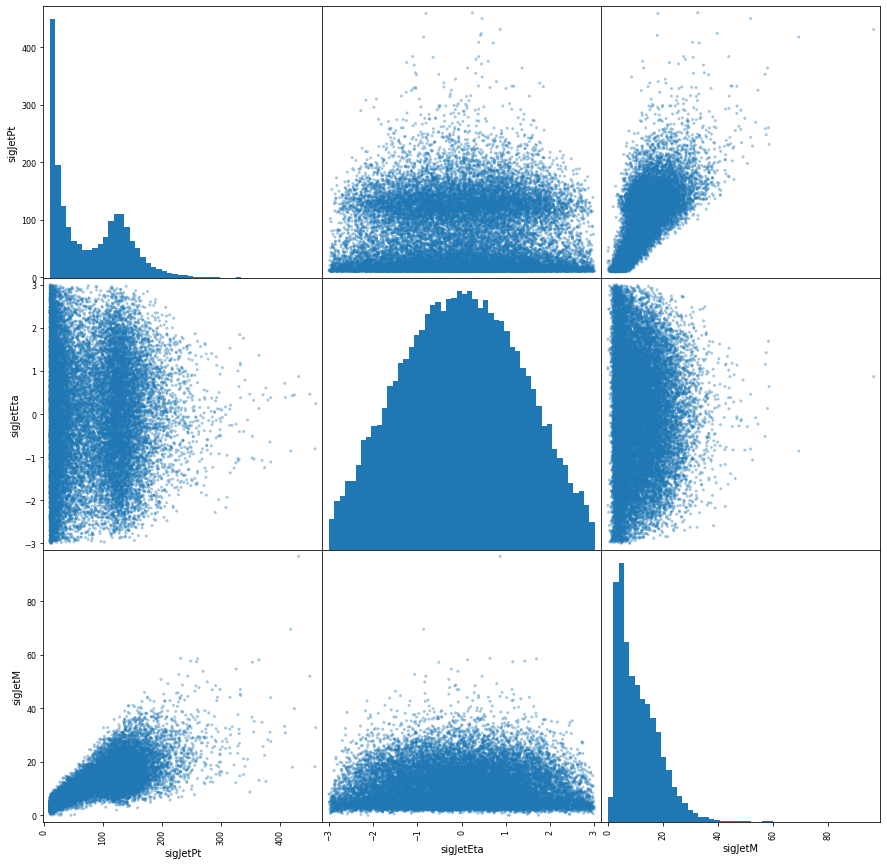

In [53]:
df1 = columns[["sigJetPt", "sigJetEta", "sigJetM"]]
pd.plotting.scatter_matrix(df1, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

In [54]:
print(df.head(),
columns.head())

                eventWeight  \
entry subentry                
0     0                 1.0   
      1                 1.0   
1     0                 1.0   
      1                 1.0   
2     0                 1.0   

                                               sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      1         ((0.05401051253248253, 0.2117232049633555, 0.0...   
1     0         ((0.18244280772383598, 0.12715347147201725, 0....   
      1         ((0.18244280772383598, 0.12715347147201725, 0....   
2     0         ((0.4285535905342619, 0.08148866094621668, 0.0...   

                                               sigJetRecurKT_erad  \
entry subentry                                                      
0     0         ((305.7553602166219, 167.10808180956826, 154.4...   
      1         ((305.7553602166219, 167.10808180956826, 154.4...   
1     0         ((1150

In [55]:
dr1 = df["sigJetRecurKT_dr12"]
dr2 = columns["sigJetRecurKT_dr12"]
print(dr1.shape, dr2.shape)
print(dr1[0],
      dr1[0].shape,
      dr2[0],
      dr2[0].shape,
      sep="\n")
print(dr1[0][0]==dr1[0][1])
print(dr2[0][0]==dr2[0][1])


(10000,) (21405,)
subentry
0    ((0.05401051253248253, 0.2117232049633555, 0.0...
1    ((0.05401051253248253, 0.2117232049633555, 0.0...
Name: sigJetRecurKT_dr12, dtype: object
(2,)
subentry
0    ((0.05401051253248253, 0.2117232049633555, 0.0...
1    ((0.05401051253248253, 0.2117232049633555, 0.0...
2    ((0.05401051253248253, 0.2117232049633555, 0.0...
Name: sigJetRecurKT_dr12, dtype: object
(3,)
True
True


In [56]:
df2 = columns[["sigJetRecurKT_dr12", "sigJetRecurKT_jetpt", "sigJetRecurKT_z"]]
df2.head()

sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      1         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      2         ((0.05401051253248253, 0.2117232049633555, 0.0...   
1     0         ((0.18244280772383598, 0.12715347147201725, 0....   
      1         ((0.18244280772383598, 0.12715347147201725, 0....   

                                              sigJetRecurKT_jetpt  \
entry subentry                                                      
0     0         ((166.2590944288185, 89.80516939280774, 82.903...   
      1         ((166.2590944288185, 89.80516939280774, 82.903...   
      2         ((166.2590944288185, 89.80516939280774, 82.903...   
1     0         ((128.4237743586658, 84.25342732612414, 65.240...   
      1         ((128.4237743586658, 84.25342732612414, 65.240...   

                                                  sigJetRecurKT_z  
entry subentry                                                     
0     0         ((0.4599679553635745, 0.07825522775342324, 0.0...  
      1         ((0.4599679553635745, 0.07825522775342324, 0.0...  
      2         ((0.4599679553635745, 0.07825522775342324, 0.0...  
1     0         ((0.3460622636732602, 0.22573960291266726, 0.4...  
      1         ((0.3460622636732602, 0.22573960291266726, 0.4...

In [57]:
pd.plotting.scatter_matrix(df2, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1080x1080 with 0 Axes>

In [ ]:
pt = tree["sigJetPt"].array().flatten().reshape(-1, 1)
m = tree["sigJetM"].array(library="np").flatten().reshape(-1, 1)
eta = tree["sigJetEta"].array(library="np").flatten().reshape(-1, 1)
print(pt.shape, m.shape, eta.shape, np.concatenate((pt, m, eta), axis=1).shape)

## Implement Bas Hofman's solutions

In [81]:
events = uproot.open(fileName)['jetTreeSig']
variables = events.keys()
print(variables)

['eventWeight', 'sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea', 'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD', 'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad', 'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12', 'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z', 'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt', 'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf', 'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta', 'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area', 'sigJetSDZ01B00dr12', 'sigJetSDZ01B00leadingtrack_pt', 'sigJetSDZ01B00logdr12', 'sigJetSDZ01B00logztheta', 'sigJetSDZ01B00mass', 'sigJetSDZ01B00zg', 'sigJetSDZ01B00ndrop', 'sigJetSDZ01B00KTPt', 'sigJetSDZ01B00KTEta', 'sigJetSDZ01B00KTPhi', 'sigJetSDZ01B00KTM', 'sigJetSDZ01B00KTArea', 'sigJetSDZ01B00KTdr12', 'sigJetSDZ01B00KTleadingtrack_pt', 'sigJetSDZ01B00KTlogdr12', 'sigJetSDZ01B00KTlogztheta', 'sigJetSDZ01B00KTmass', 'sigJetSDZ01

In [83]:
eigen = np.zeros((len(variables), len(variables), 2))
vector = np.zeros((len(variables), len(variables), 4))

def calculatePCA(var1, var2):
    matrix = events.arrays([variables[var1]]).flatten()
    matrix = np.vstack(matrix, event.array([variables[var2]]).flatten())
    matrix = matrix.T
    pca = PCA(n_components=2)
    pca.fit(matrix)
    return pca.explained_variance_,pca.components_,matrix

In [84]:
print(calculatePCA('sigJetPt', 'sigJetM'))

TypeError: list indices must be integers or slices, not str

In [89]:
matrix = events.arrays([variables[1]]).flatten()

AttributeError: no field named 'flatten'

(https://github.com/scikit-hep/awkward-1.0/blob/1.4.0/src/awkward/highlevel.py#L1127)